<a href="https://colab.research.google.com/github/KowgAnna/previsao-vendas-delivery-center/blob/main/Trabalho_IIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'brazilian-delivery-center' dataset.
Arquivos carregados com sucesso!
Pedidos: (368999, 29)
Lojas: (951, 7)


/tmp/ipython-input-500211760.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["order_moment_created"] = pd.to_datetime(orders["order_moment_created"], errors="coerce")



Valores nulos por coluna (após limpeza mínima):
order_moment_delivered               348637
order_metric_walking_time             73314
order_metric_paused_time              70662
order_moment_in_expedition            66688
order_metric_collected_time           50758
order_moment_collected                42171
order_metric_expediton_speed_time     33847
order_metric_transit_time             25126
order_moment_delivering               24588
order_metric_production_time          24387
order_moment_ready                    24386
order_metric_cycle_time               14893
order_moment_finished                 14872
order_moment_accepted                  9451
order_delivery_cost                    7197
channel_id                                0
store_id                                  0
order_id                                  0
payment_order_id                          0
order_created_day                         0
order_created_month                       0
order_created_year         

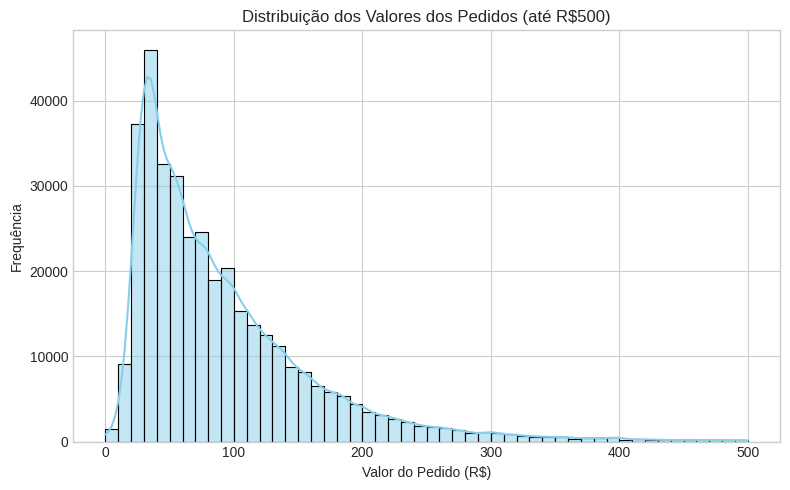

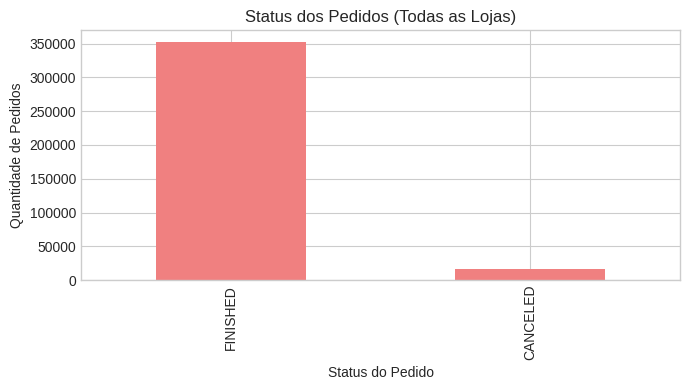

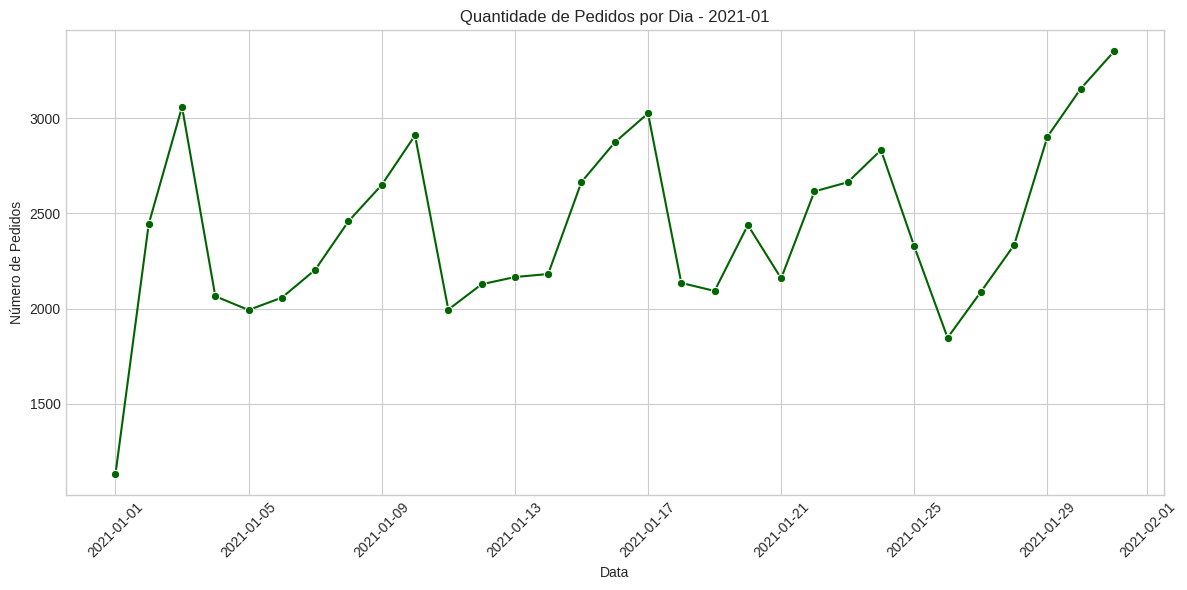

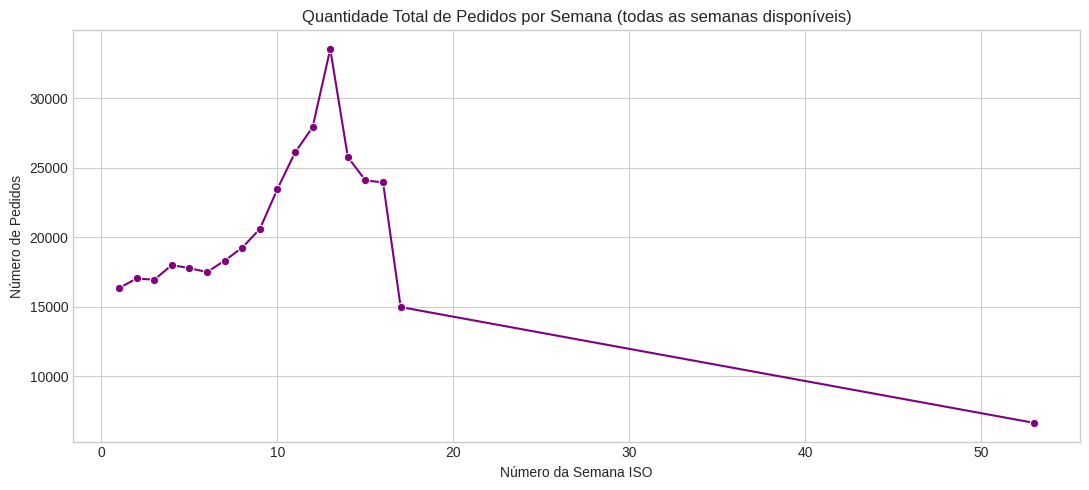


Total de restaurantes únicos: 947
Exemplo dos 100 com mais pedidos:


,store_id,store_name,qtd_pedidos
3,53,PAPA SUCIS,14004
133,676,IUMPICA,12327
152,707,IUMPICA,9271
21,149,IUMPICA,8110
32,274,IUMPICA,7920
...,...,...,...
758,3595,IASZPILITA,264
711,3265,EAVAMI FIGOI,263
419,1528,EULARAI MRIPACIA,260
135,679,ZIRIE,259


/tmp/ipython-input-500211760.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_100["store_name"], x=top_100["qtd_pedidos"], palette="viridis")


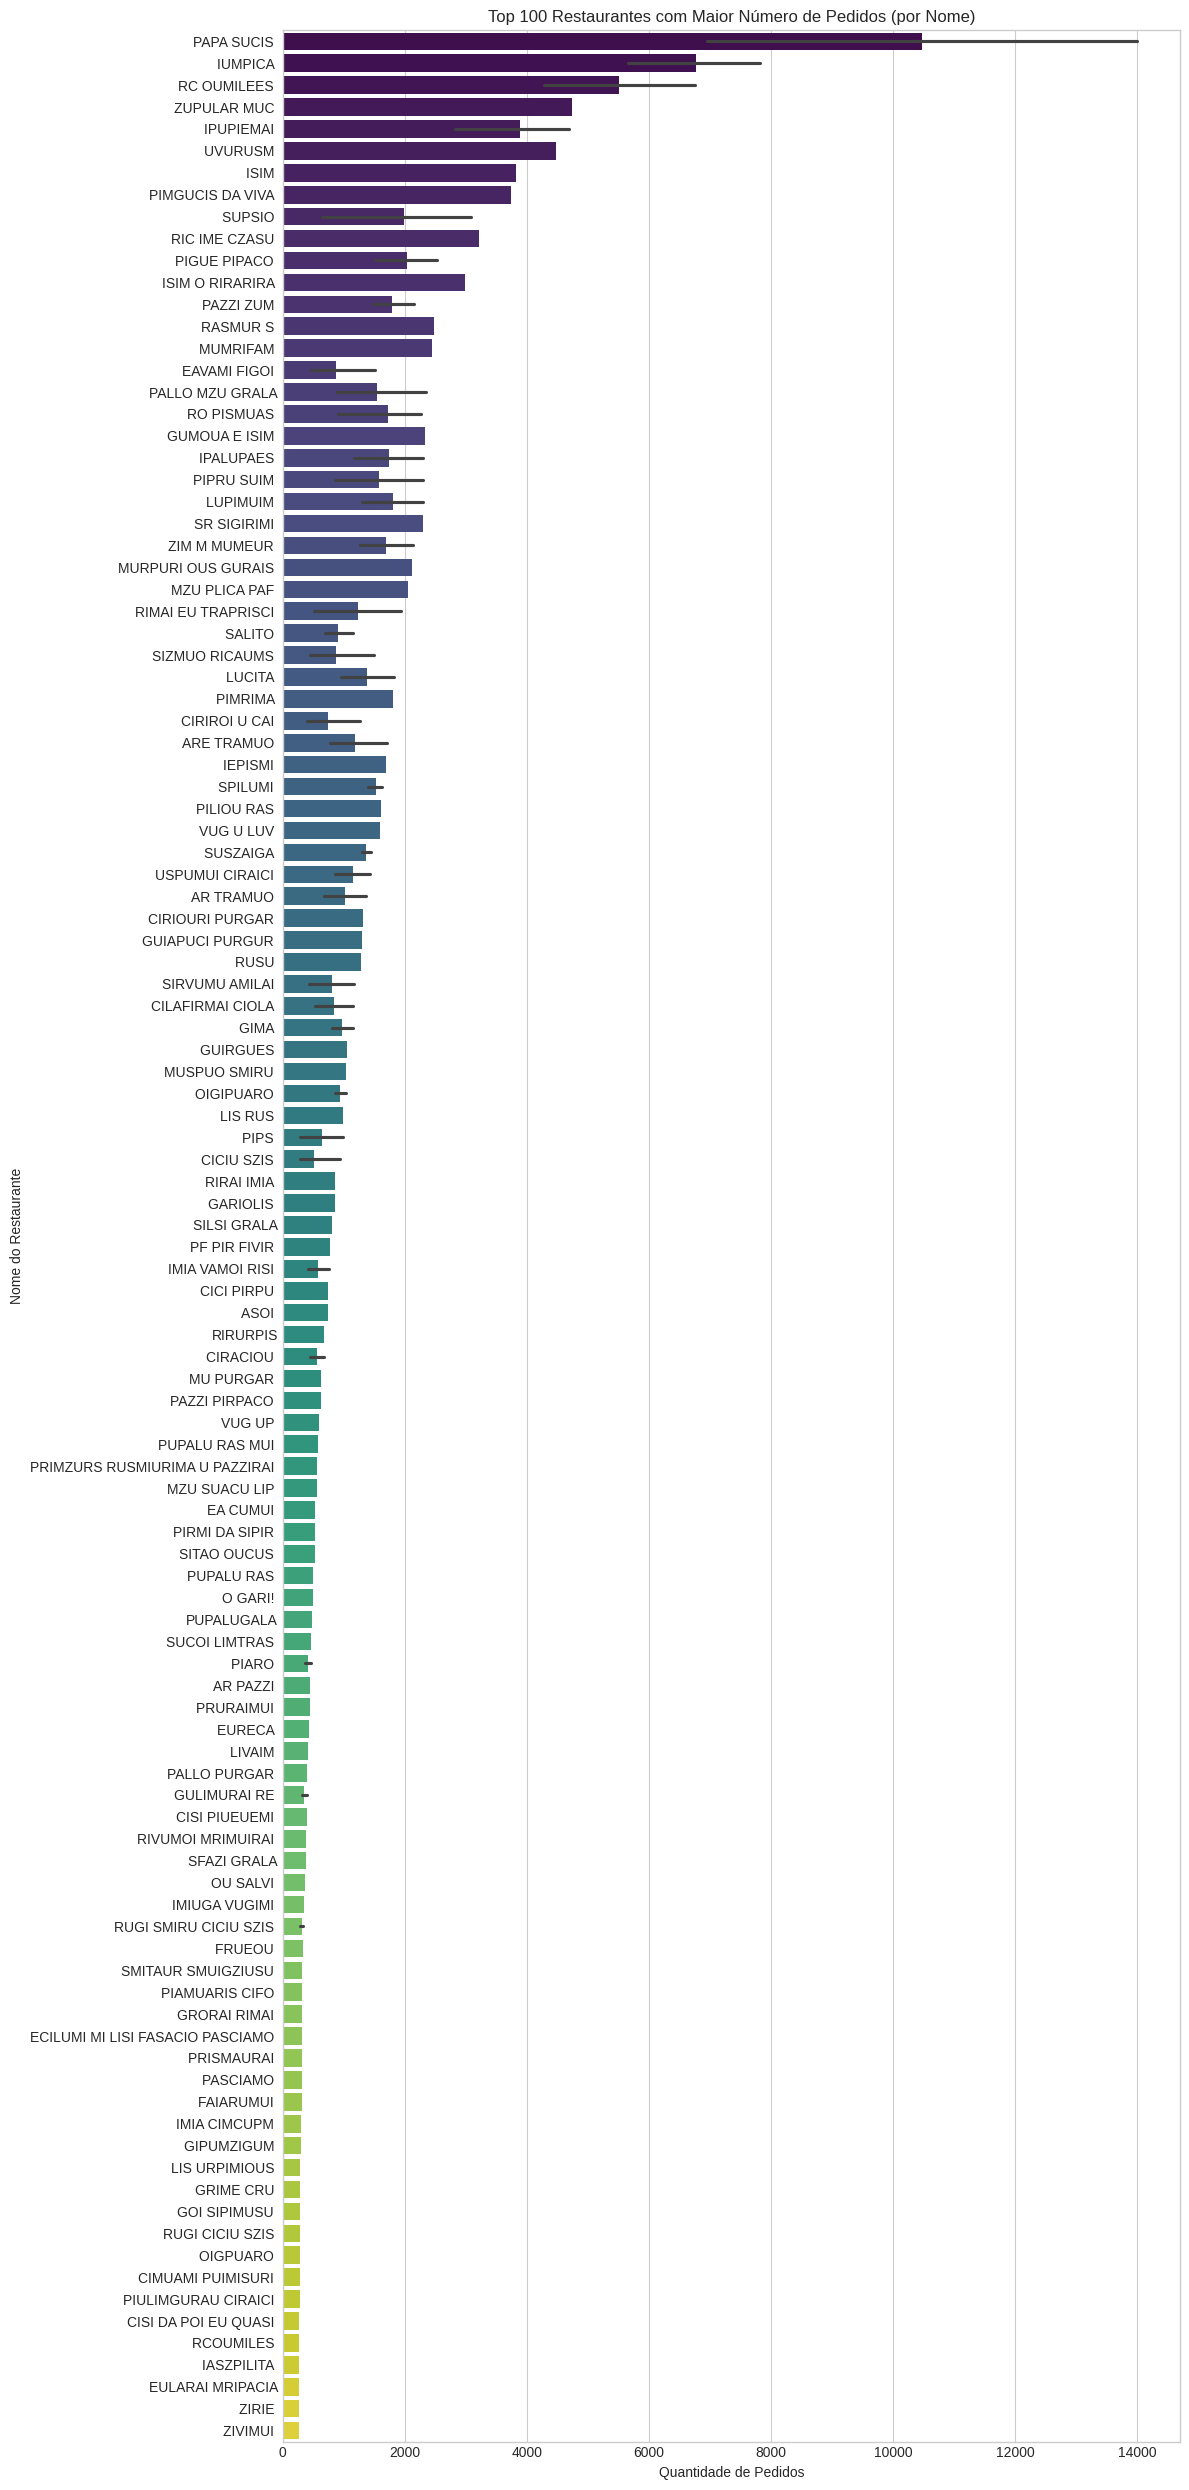

/tmp/ipython-input-500211760.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento_vendas.values, y=segmento_vendas.index, palette="coolwarm")


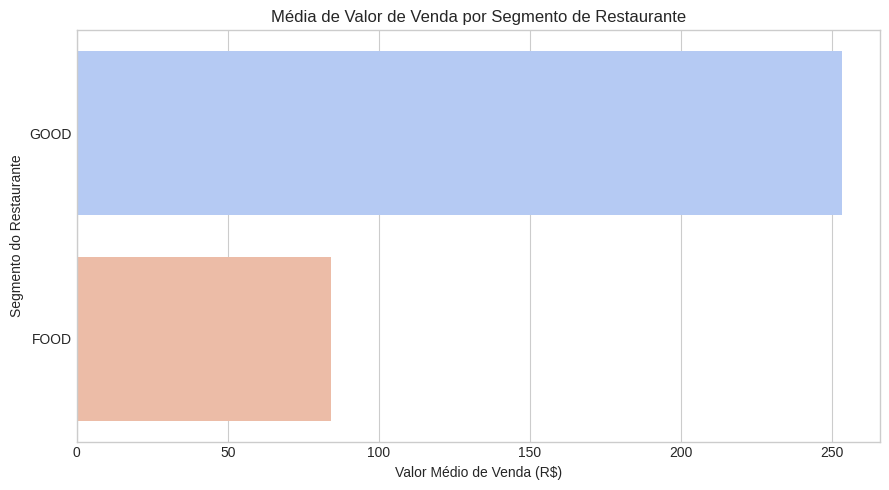



 PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA:
- O dataset contém aproximadamente 370 mil pedidos e 951 restaurantes (antes de filtros).
- Fiz uma limpeza mínima: removi datas inválidas e pedidos com valor <= 0.
- A distribuição de valores foi mostrada até R$500 para evitar que outliers extremos distorçam o gráfico.
- Escolhi janeiro de 2021 como exemplo para o gráfico diário (pode mudar as variáveis inicio/fim).
- Os nomes dos restaurantes aparecem agora nos gráficos (em vez de IDs).
- Segmentos foram padronizados e mapeados para nomes mais legíveis.


from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['store_id'].plot(kind='hist', bins=20, title='store_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['qtd_pedidos'].plot(kind='hist', bins=20, title='qtd_pedidos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='index', y='store_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='store_id', y='qtd_pedidos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['store_id'].plot(kind='line', figsize=(8, 4), title='store_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['qtd_pedidos'].plot(kind='line', figsize=(8, 4), title='qtd_pedidos')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
# PROJETO: Previsão de Vendas Diárias - EDA Completa (951 restaurantes)
# Disciplina: Inteligência Artificial - IF Goiano / Campus Iporá

# Importação das Bibliotecas
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual dos gráficos
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

# Download e Leitura dos Dados
path = kagglehub.dataset_download("nosbielcs/brazilian-delivery-center")

orders = pd.read_csv(f"{path}/orders.csv", encoding="latin-1")
stores = pd.read_csv(f"{path}/stores.csv", encoding="latin-1")

print("Arquivos carregados com sucesso!")
print("Pedidos:", orders.shape)   # deve mostrar ~370.000
print("Lojas:", stores.shape)     # deve mostrar ~951

# Conversão de Datas e Criação de Colunas Temporais
# Converter para datetime (força coerção de formatos)
orders["order_moment_created"] = pd.to_datetime(orders["order_moment_created"], errors="coerce")

# Remover linhas sem data válida (se quiser manter, comente a próxima linha)
orders = orders.dropna(subset=["order_moment_created"])

# Colunas temporais básicas (números)
orders["data_pedido"] = orders["order_moment_created"].dt.date
orders["semana_pedido"] = orders["order_moment_created"].dt.isocalendar().week
orders["dia_semana_num"] = orders["order_moment_created"].dt.weekday  # 0 = segunda
orders["mes_num"] = orders["order_moment_created"].dt.month

# Mapear números para nomes em português (sem depender de locale)
dias_map = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}
meses_map = {
    1: "janeiro", 2: "fevereiro", 3: "março", 4: "abril",
    5: "maio", 6: "junho", 7: "julho", 8: "agosto",
    9: "setembro", 10: "outubro", 11: "novembro", 12: "dezembro"
}

orders["dia_semana"] = orders["dia_semana_num"].map(dias_map)
orders["mes"] = orders["mes_num"].map(meses_map)

# Limpeza de Dados (valores de pedido)
# Remover pedidos sem amount e valores <= 0
orders = orders.dropna(subset=["order_amount"])
orders = orders[orders["order_amount"] > 0]

print("\nValores nulos por coluna (após limpeza mínima):")
print(orders.isnull().sum().sort_values(ascending=False))

print("\nEstatísticas descritivas de order_amount (após limpeza):")
print(orders["order_amount"].describe())

# Distribuição dos Valores dos Pedidos (filtrando outliers extremos)
# Para visualizar a distribuição mais representativa, filtrar pedidos <= 500
orders_filtrado = orders[orders["order_amount"] <= 500]

plt.figure(figsize=(8,5))
sns.histplot(orders_filtrado["order_amount"], bins=50, kde=True, color="skyblue")
plt.title("Distribuição dos Valores dos Pedidos (até R$500)")
plt.xlabel("Valor do Pedido (R$)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# Status dos Pedidos
plt.figure(figsize=(7,4))
orders["order_status"].value_counts().plot(kind="bar", color="lightcoral")
plt.title("Status dos Pedidos (Todas as Lojas)")
plt.xlabel("Status do Pedido")
plt.ylabel("Quantidade de Pedidos")
plt.tight_layout()
plt.show()

# Pedidos por Dia (exibir um mês completo)
# Escolher o mês que quiser -> exemplo: janeiro de 2021.
inicio = "2021-01-01"
fim = "2021-02-01"

orders_mes = orders[(orders["order_moment_created"] >= inicio) & (orders["order_moment_created"] < fim)]
pedidos_por_dia = orders_mes.groupby("data_pedido")["order_id"].count().reset_index().rename(columns={"order_id":"quantidade_pedidos"})
pedidos_por_dia = pedidos_por_dia.sort_values("data_pedido")

plt.figure(figsize=(12,6))
sns.lineplot(data=pedidos_por_dia, x="data_pedido", y="quantidade_pedidos", marker="o", color="darkgreen")
plt.title(f"Quantidade de Pedidos por Dia - {inicio[:7]}")
plt.xlabel("Data")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pedidos por Semana (tendência ao longo do ano)
pedidos_por_semana = orders.groupby("semana_pedido")["order_id"].count().reset_index().rename(columns={"order_id":"quantidade_pedidos"})
pedidos_por_semana = pedidos_por_semana.sort_values("semana_pedido")

plt.figure(figsize=(11,5))
sns.lineplot(data=pedidos_por_semana, x="semana_pedido", y="quantidade_pedidos", marker="o", color="purple")
plt.title("Quantidade Total de Pedidos por Semana (todas as semanas disponíveis)")
plt.xlabel("Número da Semana ISO")
plt.ylabel("Número de Pedidos")
plt.tight_layout()
plt.show()

# Total de Pedidos por Restaurante (com nome)
pedidos_por_loja = (
    orders.merge(stores[["store_id", "store_name"]], on="store_id", how="left")
    .groupby(["store_id", "store_name"])["order_id"]
    .count()
    .reset_index()
    .rename(columns={"order_id": "qtd_pedidos"})
    .sort_values(by="qtd_pedidos", ascending=False)
)

print("\nTotal de restaurantes únicos:", pedidos_por_loja.shape[0])
print("Exemplo dos 100 com mais pedidos:")
display(pedidos_por_loja.head(200))

# Gráfico dos 100 Restaurantes com Mais Pedidos (nomes)
top_100 = pedidos_por_loja.head(200)

plt.figure(figsize=(12,25))
sns.barplot(y=top_100["store_name"], x=top_100["qtd_pedidos"], palette="viridis")
plt.title("Top 100 Restaurantes com Maior Número de Pedidos (por Nome)")
plt.xlabel("Quantidade de Pedidos")
plt.ylabel("Nome do Restaurante")
plt.tight_layout()
plt.show()

# Junção completa com dados de lojas e correções de segmento
dados = orders.merge(stores, on="store_id", how="left")

# Ajustes de nomes em store_segment (padronizar)
dados["store_segment"] = dados["store_segment"].replace({
    "good": "food",
    "Food": "food",
    "Beverages": "beverages"
})

# Mapear 'food'/'beverages' para Português para o relatório
segmento_map_portugues = {
    "food": "Comida",
    "beverages": "Bebidas"
}
dados["segmento_portugues"] = dados["store_segment"].map(segmento_map_portugues).fillna(dados["store_segment"])

# Média de Vendas por Segmento (com nomes em português quando possível)
segmento_vendas = (
    dados.groupby("segmento_portugues")["order_amount"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(9,5))
sns.barplot(x=segmento_vendas.values, y=segmento_vendas.index, palette="coolwarm")
plt.title("Média de Valor de Venda por Segmento de Restaurante")
plt.xlabel("Valor Médio de Venda (R$)")
plt.ylabel("Segmento do Restaurante")
plt.tight_layout()
plt.show()

# Resumo da EDA
print("\n\n PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA:")
print("- O dataset contém aproximadamente 370 mil pedidos e 951 restaurantes (antes de filtros).")
print("- Fiz uma limpeza mínima: removi datas inválidas e pedidos com valor <= 0.")
print("- A distribuição de valores foi mostrada até R$500 para evitar que outliers extremos distorçam o gráfico.")
print("- Escolhi janeiro de 2021 como exemplo para o gráfico diário (pode mudar as variáveis inicio/fim).")
print("- Os nomes dos restaurantes aparecem agora nos gráficos (em vez de IDs).")
print("- Segmentos foram padronizados e mapeados para nomes mais legíveis.")

Using Colab cache for faster access to the 'brazilian-delivery-center' dataset.
Arquivos carregados com sucesso!
Pedidos: (368999, 29)
Lojas: (951, 7)


/tmp/ipython-input-1086705831.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["order_moment_created"] = pd.to_datetime(orders["order_moment_created"], errors="coerce")


Colunas de segmento detectadas: ['store_segment_FOOD', 'store_segment_GOOD']

MÉTRICAS DO MODELO BASE:
MAE: 0.7925
RMSE: 1.0257
R²: 0.5092


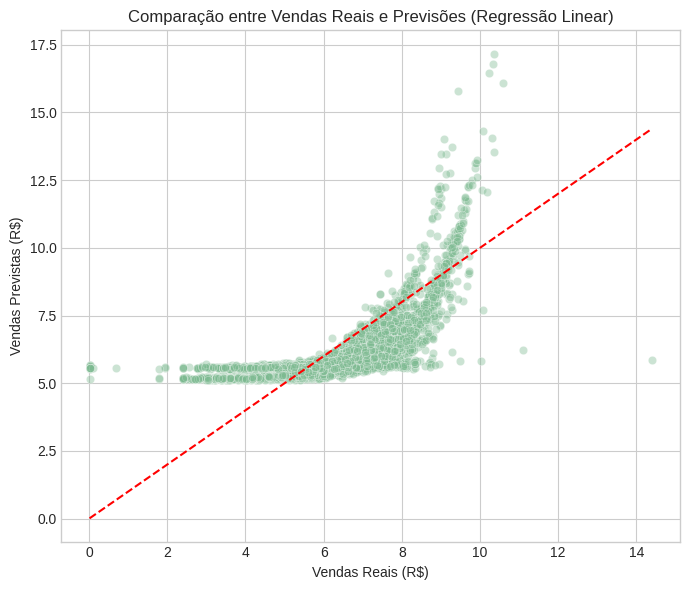

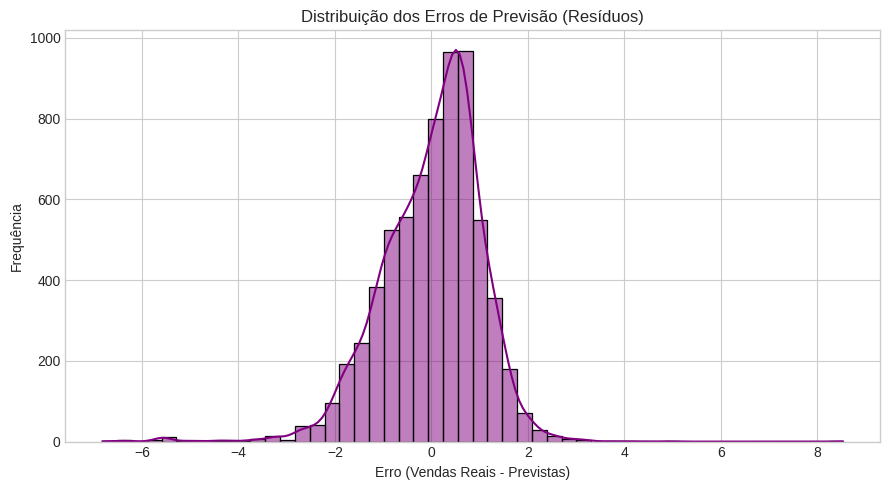

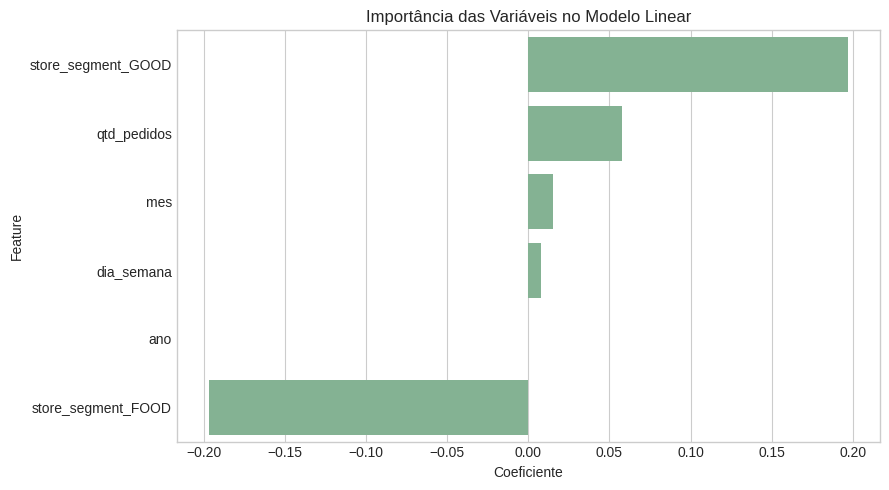


Etapa 2 completa: Pré-processamento, Feature Engineering e Modelo Base


In [9]:
# PROJETO: Previsão de Vendas Diárias - Etapa 2: Pré-processamento e Modelo Base
# Disciplina: Inteligência Artificial - IF Goiano / Campus Iporá

# Importação das Bibliotecas
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

# Download e Leitura dos Dados
path = kagglehub.dataset_download("nosbielcs/brazilian-delivery-center")
orders = pd.read_csv(f"{path}/orders.csv", encoding="latin-1")
stores = pd.read_csv(f"{path}/stores.csv", encoding="latin-1")

print("Arquivos carregados com sucesso!")
print("Pedidos:", orders.shape)
print("Lojas:", stores.shape)

# Conversão de Datas
orders["order_moment_created"] = pd.to_datetime(orders["order_moment_created"], errors="coerce")
orders = orders.dropna(subset=["order_moment_created"])
orders["data_pedido"] = orders["order_moment_created"].dt.date
orders["ano"] = orders["order_moment_created"].dt.year
orders["mes"] = orders["order_moment_created"].dt.month
orders["dia_semana"] = orders["order_moment_created"].dt.weekday

# Limpeza e Cálculo de Vendas por Restaurante/Dia
orders = orders.dropna(subset=["order_amount"])
orders = orders[orders["order_amount"] > 0]

# Combinar com informações das lojas
dados = orders.merge(stores, on="store_id", how="left")

# Calcular vendas totais por restaurante e data
vendas_diarias = (
    dados.groupby(["store_id", "store_segment", "data_pedido", "ano", "mes", "dia_semana"])
    .agg(qtd_pedidos=("order_id", "count"), valor_total=("order_amount", "sum"))
    .reset_index()
)

# Aplicar log transform para reduzir efeito dos valores extremos
vendas_diarias["valor_total_log"] = np.log1p(vendas_diarias["valor_total"])

# Criação de Features (Feature Engineering)
# One-Hot Encoding (transforma categorias em colunas binárias)
vendas_final = pd.get_dummies(vendas_diarias, columns=["store_segment"], drop_first=False)

# Mostrar as colunas criadas automaticamente
colunas_disponiveis = [c for c in vendas_final.columns if c.startswith("store_segment_")]
print("Colunas de segmento detectadas:", colunas_disponiveis)

# Seleção de Features e Target
features = ["qtd_pedidos", "mes", "dia_semana", "ano"] + colunas_disponiveis
X = vendas_final[features]
y = vendas_final["valor_total_log"]

# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Base - Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Avaliação do Modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMÉTRICAS DO MODELO BASE:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Comparação entre valores reais e previstos
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Comparação entre Vendas Reais e Previsões (Regressão Linear)")
plt.xlabel("Vendas Reais (R$)")
plt.ylabel("Vendas Previstas (R$)")
plt.tight_layout()
plt.show()

# Distribuição dos Erros (Resíduos)
residuos = y_test - y_pred
plt.figure(figsize=(9,5))
sns.histplot(residuos, bins=50, kde=True, color="purple")
plt.title("Distribuição dos Erros de Previsão (Resíduos)")
plt.xlabel("Erro (Vendas Reais - Previstas)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# Importância dos Coeficientes
coeficientes = pd.DataFrame({"Feature": X.columns, "Coeficiente": modelo.coef_}).sort_values(by="Coeficiente", ascending=False)
plt.figure(figsize=(9,5))
sns.barplot(data=coeficientes.head(10), x="Coeficiente", y="Feature")
plt.title("Importância das Variáveis no Modelo Linear")
plt.tight_layout()
plt.show()

print("\nEtapa 2 completa: Pré-processamento, Feature Engineering e Modelo Base")
